In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("test_scores.csv")
data.head()

,英語,数学,理科,国語,社会
0,69,39,56,63,83
1,47,75,83,93,92
2,75,57,60,74,82
3,63,63,80,67,71
4,81,76,52,78,64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a195aea58>,
      dtype=object)

/Users/apple/opt/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29702 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.6/site-packages/matplotlib

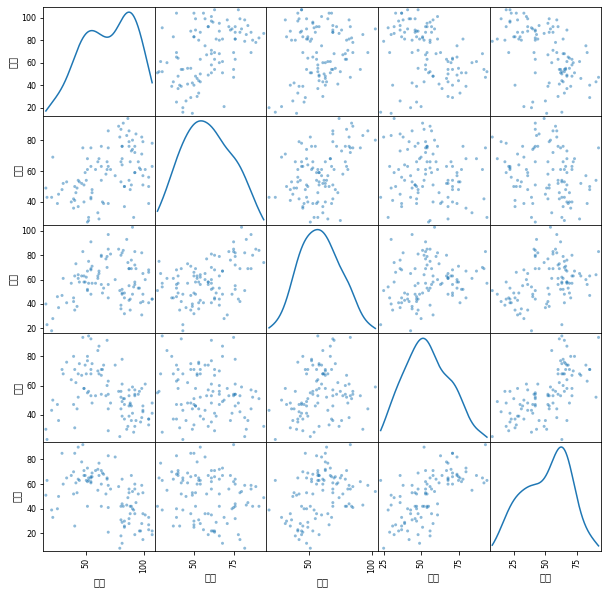

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,diagonal="kde",figsize=(10,10))

In [6]:
from sklearn.decomposition import PCA
pca = PCA().fit(data)

#PCAをインポート
#fitメソッドでパラメーターの学習を行う

In [7]:
print("load:",pca.explained_variance_ratio_)
print("cum load:",pca.explained_variance_ratio_.cumsum())

#分布の割合
#赤色部分は、loadとcum loadの文字列を結果に↓表示するために入力している

load: [0.49837049 0.2760591  0.1113373  0.07016334 0.04406977]
cum load: [0.49837049 0.77442959 0.88576689 0.95593023 1.        ]


Text(0, 0.5, 'PC2')

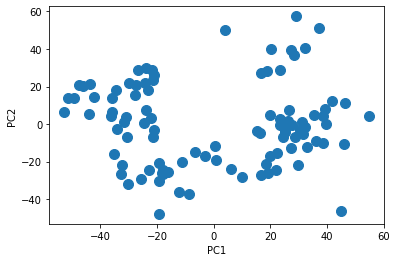

In [8]:
#散布図を描く　　(trans　は、tranceでないのでスペルに注意)
Z=pca.transform(data)
plt.scatter(Z[:,0],Z[:,1],s=100)

#縦横軸のラベルをつける
plt.xlabel("PC1")
plt.ylabel("PC2")


In [18]:
#ここからは、クラスタリング分析　　上記までのデータを使用する。　

In [9]:
from sklearn import cluster
kmeans = cluster.KMeans(5).fit(data)
print(kmeans.cluster_centers_)

#sklean.clusterに実装されているKMeanモジュールを用いる

[[91.38709677 59.48387097 48.77419355 43.61290323 29.06451613]
 [60.64285714 64.14285714 65.14285714 74.71428571 69.71428571]
 [27.11111111 46.66666667 34.11111111 39.         45.22222222]
 [80.65       79.15       81.55       48.7        52.        ]
 [48.57692308 42.69230769 58.76923077 68.69230769 68.15384615]]


In [10]:
labels = kmeans.predict(data)
print(labels)

#各サンプルにクラスラベルをつける

[4 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 4 4 4 4 4 1 4
 1 4 1 4 4 4 4 4 4 4 1 4 3 4 4 4 4 4 4 4 1 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 4 2 2]


In [11]:
#このクラスタリングを使用して、クラスタリングを可視化する
#５次元データなので、PCAを使用して２次元空間に落としてラベルごとに色をつけてプロットする
#クラスタの中心もPCAで作った２次元空間上に変換して一緒にプロットする

主成分分析(Principal Component Analysis, PCA)とは、データの無相関化とデータの次元の削減を行う手法
簡単に言うと、データを分析しやすいように再構成し、可能なら次元を下げること

なぜ次元を削減する必要があるかと言うと、機械学習や統計において、データの次元が大きすぎると認識精度が悪くなる、次元の呪いという現象を回避するため
(2次元や3次元に変換できると可視化できる、というメリットもある)

Text(0, 0.5, 'PC2')

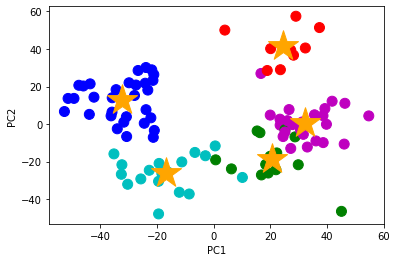

In [12]:
from sklearn.decomposition import PCA
pca=PCA().fit(data)

cz = pca.transform(kmeans.cluster_centers_)
colors=["b","g","r","c","m"]

#散布図をプロットする
plt.scatter(Z[:, 0], Z[:, 1], s=100, c=[colors[i] for i in labels])
plt.scatter(cz[:, 0],cz[:, 1],s=1000,c="orange",marker="*")

plt.xlabel("PC1")
plt.ylabel("PC2")

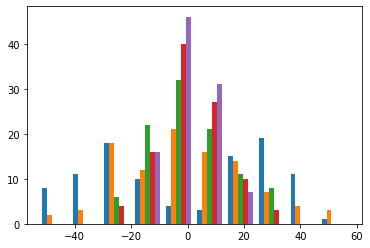

In [13]:
from sklearn.decomposition import PCA
pca=PCA().fit(data)

cz = pca.transform(kmeans.cluster_centers_)
colors=["b","g","r","c","m"]

c,x,_=plt.hist(Z)

In [ ]:
#https://algorithm.joho.info/machine-learning/python-scikit-learn-clustering-kmean-add-id/#i-3  
#K-means法でデータにラベリングのリンク　次回　作業時に参照